# Perform t-SNE analysis for NACT samples

Script related to figure 5c

### Aim:
- See how gene expression profiles cluster across patients

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.manifold as tsne
import matplotlib.pyplot as plt

In [2]:
home = '~/git_repos/HGSOC_TME_Heterogeneity/'

## Get sample labels

### Load file

In [3]:
file_keys = home + 'Data/5/NACT_SampleLabels.txt'

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

In [4]:
sample_labels.head()

,Name,Case_mRNA,NACT,Site,Bounds
Well,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in
A02,A02_3368B_Liver,3368,Treated,other,out
A03,A03_0371A_R_diaphragm,371,Untreated,other,out
A04,A04_0371B_R_diaphragm,371,Treated,other,out
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in


In [5]:
len(set(sample_labels.Case_mRNA))

28

### Define sample colour

In [6]:
case_mrna = list(set(sample_labels['Case_mRNA']))

colours = sns.color_palette("husl", len(case_mrna)).as_hex()

sample_labels['Colour'] = sample_labels['Case_mRNA'].replace(case_mrna, colours)

### Define sample markers

In [7]:
sites = ['ovary','omentum','other']
markers = ['o','^','s']

sample_labels['Site_marker'] = sample_labels['Site'].replace(sites,markers)

In [8]:
sample_labels.head()

,Name,Case_mRNA,NACT,Site,Bounds,Colour,Site_marker
Well,,,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in,#62ae31,s
A02,A02_3368B_Liver,3368,Treated,other,out,#62ae31,s
A03,A03_0371A_R_diaphragm,371,Untreated,other,out,#f45deb,s
A04,A04_0371B_R_diaphragm,371,Treated,other,out,#f45deb,s
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in,#f564d1,o


## Load expression data

In [9]:
data_file = home + 'Data/5/NACT_log2exp_loess_norm.txt'

data = pd.read_csv(data_file,
                  sep='\t',
                  index_col='Hugo_Symbol')

In [10]:
data.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,3.878105,3.954775,3.854334,3.974302,3.760565,3.757145,3.734362,3.935987,3.807211,3.514725,...,3.919331,3.896646,4.027690,3.685888,3.765937,4.086110,4.000239,3.662362,3.896871,3.654871
A2BP1,2.862997,3.279474,3.957806,3.993876,3.641308,3.249292,3.347323,3.358668,3.616479,3.572950,...,3.490291,4.059473,3.679676,3.418869,2.924245,3.346328,3.899451,3.933936,4.425151,3.723115
A2M,5.516461,5.882656,6.421447,5.980470,5.049547,5.220719,5.492205,6.471173,5.341425,5.482726,...,6.366298,6.483692,5.784733,4.950854,6.164623,4.974455,6.709993,6.645714,6.391323,6.134008
A2ML1,3.958668,4.100177,3.250522,3.396357,3.851866,4.052745,3.635604,3.143886,3.999510,3.988277,...,3.300078,3.488284,3.120832,3.868837,3.519030,3.891299,3.151470,3.353788,3.617326,3.950268
A4GALT,3.087003,2.995708,3.395173,2.859539,2.976988,3.332730,3.317251,3.490682,3.087911,3.153865,...,3.440970,3.364598,3.214461,2.922184,3.054724,2.811116,2.929423,3.364648,3.325120,3.196659


## Calculate t-SNE

### Transpose data frame

In [11]:
data.head()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,D12,E01,E02,E03,E04,E05,E06,E07,E08,E09
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,3.878105,3.954775,3.854334,3.974302,3.760565,3.757145,3.734362,3.935987,3.807211,3.514725,...,3.919331,3.896646,4.027690,3.685888,3.765937,4.086110,4.000239,3.662362,3.896871,3.654871
A2BP1,2.862997,3.279474,3.957806,3.993876,3.641308,3.249292,3.347323,3.358668,3.616479,3.572950,...,3.490291,4.059473,3.679676,3.418869,2.924245,3.346328,3.899451,3.933936,4.425151,3.723115
A2M,5.516461,5.882656,6.421447,5.980470,5.049547,5.220719,5.492205,6.471173,5.341425,5.482726,...,6.366298,6.483692,5.784733,4.950854,6.164623,4.974455,6.709993,6.645714,6.391323,6.134008
A2ML1,3.958668,4.100177,3.250522,3.396357,3.851866,4.052745,3.635604,3.143886,3.999510,3.988277,...,3.300078,3.488284,3.120832,3.868837,3.519030,3.891299,3.151470,3.353788,3.617326,3.950268
A4GALT,3.087003,2.995708,3.395173,2.859539,2.976988,3.332730,3.317251,3.490682,3.087911,3.153865,...,3.440970,3.364598,3.214461,2.922184,3.054724,2.811116,2.929423,3.364648,3.325120,3.196659


In [12]:
data_t = data.T

In [13]:
data_tsne = tsne.TSNE(learning_rate=100,
                      n_iter=5000,
                      perplexity=5).fit_transform(data_t.values)

## Plot t-SNE

### Create custom colormaps (a.k.a. cmaps)

In [14]:
def make_cmap(colors, position=None, bit=False):
    
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    
    return cmap

### Convert hex to rgb colour

In [15]:
def hex_to_rgb(value):
    
    '''Return (red, green, blue) for the color given as #rrggbb.'''
    
    value = value.lstrip('#')
    lv = len(value)
    
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

### Define cmaps for patient treatment kernel densities

In [16]:
NACT_colours = []
for sample in sample_labels.index:
    
    if sample_labels['NACT'][sample] == 'Untreated':
        NACT_colours.append('w')
    
    elif sample_labels['NACT'][sample] == 'Treated':
        NACT_colours.append(sample_labels['Colour'][sample])
    
    elif np.isnan(NACT_colours['NACT'][sample]):
        NACT_colours.append('w')
    
    else:
        raise ValueError()

In [17]:
NACT_colours_df = pd.DataFrame({'wells': sample_labels.index,
                                'NACT_colour':pd.Series(NACT_colours)})

NACT_colours_df.set_index('wells',
                          inplace=True)

sample_labels['NACT_colour'] = NACT_colours_df

In [18]:
white = (255,255,255)

reds = make_cmap([white, hex_to_rgb('#e41a1c')], bit=True)
blues = make_cmap([white, hex_to_rgb('#377eb8')], bit=True)
reds_r = make_cmap([hex_to_rgb('#e41a1c'), white], bit=True)
blues_r = make_cmap([hex_to_rgb('#377eb8'), white], bit=True)

### Colour-treatment correspondence

In [19]:
NACT_colour_d = {'Treated':reds,
                 'Untreated':blues}

NACT_colour_dr = {'Treated':reds_r,
                  'Untreated':blues_r}

In [20]:
sample_labels.head()

,Name,Case_mRNA,NACT,Site,Bounds,Colour,Site_marker,NACT_colour
Well,,,,,,,,
A01,A01_3368A_Liver,3368,Untreated,other,in,#62ae31,s,w
A02,A02_3368B_Liver,3368,Treated,other,out,#62ae31,s,#62ae31
A03,A03_0371A_R_diaphragm,371,Untreated,other,out,#f45deb,s,w
A04,A04_0371B_R_diaphragm,371,Treated,other,out,#f45deb,s,#f45deb
A05,A05_9717A_R_ovary,9717,Untreated,ovary,in,#f564d1,o,w


### Plot

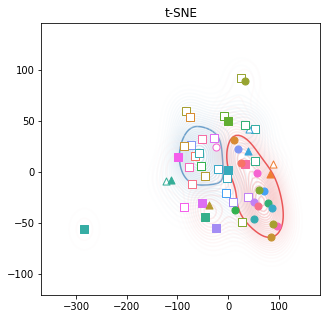

In [22]:
fig = plt.figure(figsize=(5, 5))

plt.title('t-SNE')

d_kde = {}
for i in range(len(data_tsne[:, 0])):
    
    plt.scatter(data_tsne[:, 0][i],
                data_tsne[:, 1][i],
                c=list(sample_labels['NACT_colour'])[i],
                edgecolors=list(sample_labels['Colour'])[i],
                marker=list(sample_labels['Site_marker'])[i],
                zorder=1,
                lw=1,
                s=50)
    
    if list(sample_labels['NACT'])[i] not in d_kde:
        
        d_kde[list(sample_labels['NACT'])[i]] = {'x':[data_tsne[:, 0][i]],
                                                 'y':[data_tsne[:, 1][i]]}
                                                 
    else:
        
        d_kde[list(sample_labels['NACT'])[i]]['x'].append(data_tsne[:, 0][i])
        d_kde[list(sample_labels['NACT'])[i]]['y'].append(data_tsne[:, 1][i])
        
for j in d_kde:

    sns.kdeplot(np.array(d_kde[j]['x']),
                np.array(d_kde[j]['y']),
                cmap=NACT_colour_d[j],
                n_levels=27,
                alpha=.2,
                zorder=0,
                cut=3)
    
    sns.kdeplot(np.array(d_kde[j]['x']),
                np.array(d_kde[j]['y']),
                cmap=NACT_colour_dr[j],
                n_levels=1,
                alpha=.7,
                zorder=0,
                cut=3)

#plt.xlim(-100,100)    
#plt.ylim(-100,100)

### Save plot

In [ ]:
fig.savefig('../../Figures/main/5/panles/5c_NACT_tSNE.pdf',
            bbox='tight')

# End of script